In [1]:
from qiskit import *
from matplotlib import *
from pylatexenc import *

In [2]:
# 2 qubit quantum circuit
quantum_register = QuantumRegister(2)

In [3]:
# 2 bit classical register to take measurement from  quantum bits
classical_register = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(quantum_register, classical_register)

In [7]:
#2 qubits and 2 classical bits in the circuit
circuit.draw() 

q0_0: 
      
q0_1: 
      
c0: 2/

In [8]:
circuit.h(quantum_register[0])

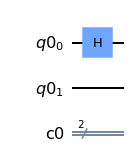

In [11]:
circuit.draw(output='mpl')

In [12]:
#two qubit operation called controlled x. logical if for quantum computers.
circuit.cx(quantum_register[0], quantum_register[1])

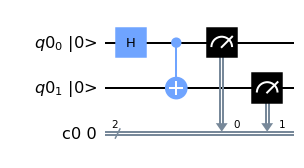

In [34]:
circuit.draw(output='mpl', initial_state=True)

In [14]:
#With these two operations, we're now able to generate entanglement with q00 and q01

In [15]:
circuit.measure(quantum_register, classical_register)

In [17]:
#Local simulation of quantum computers can be done vai aer
simulator = Aer.get_backend('qasm_simulator')
#qasm comes from quantom assembly language

In [19]:
result = execute(circuit, simulator).result()

In [20]:
 from qiskit.tools.visualization import plot_histogram

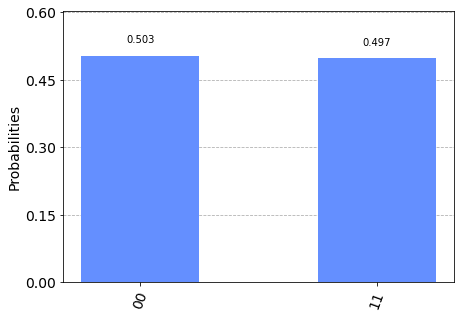

In [23]:
plot_histogram(result.get_counts(circuit))
#these small errors are due to we running a limited number of shots intead of infinite number of shots
#don't know what that means, exactly... I can't even see the error he's talking about here. 
#Maybe because it should be 50 - 50 but there's this small deviation, I don't know I'm guessing, don't really know
#what the result should look like.

In [24]:
IBMQ.load_account()

/home/alvieal/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [25]:
provider = IBMQ.get_provider('ibm-q')

In [26]:
quantum_computer = provider.get_backend('ibmq_16_melbourne')

In [27]:
job = execute(circuit, quantum_computer)

In [32]:
from qiskit.tools.monitor import job_monitor, backend_overview

In [29]:
job_monitor(job)

Job Status: job has successfully run


In [30]:
result = job.result()

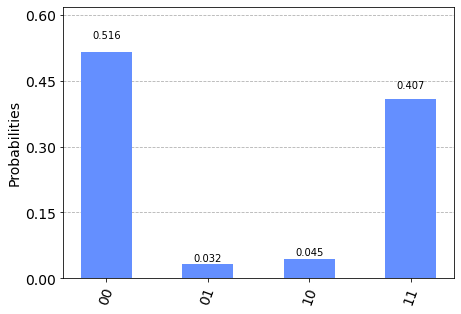

In [31]:
plot_histogram(result.get_counts(circuit))

In [33]:
backend_overview()

ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 1              Pending Jobs: 10             Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      139.9          Avg. T1:      76.0           Avg. T1:      178.6
Avg. T2:      122.7          Avg. T2:      75.9           Avg. T2:      206.3



ibmq_valencia                ibmq_ourense                 ibmq_vigo
-------------                ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1              Pending Jobs: 173            Pending Jobs: 909
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operat